In [148]:
import pandas as pd
                       
features = pd.read_excel(r'E:\\hackstat final round\\Variables Finalized - Insurance.xlsx')
trainset = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')

In [34]:
print(features.shape)
features

(21, 2)


,Feature,Feature Description
0,ID,Record Identifier
1,TENURE_QUINTILES,Quintiles of policy tenure (snapshot date - co...
2,payment_pr1q_mean_diff_days,Average number of days between due and paid da...
3,payment_pr1q_num_payments,Number of payments in the past three months fr...
4,FUND_VALUE2,Fund value
5,Mode_Month,Payment frequency is monthly (0/1)
6,payment_pr1q_med_diff_days,Median of number of days between due and paid ...
7,payment_pr1q_sd_diff_days,Standard deviation of number of days between d...
8,payment_pr1q_num_past_due,Number of past-due payments in the past three ...
9,payment_pr1q_num_past_due_30d,Number of >30 days past-due payments in the pa...


In [35]:
print(trainset.shape)
trainset

(60007, 21)


,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,...,3,3050.669914,18127.10254,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.52822,0,36.998385,4.362300,NaN,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [36]:
trainset.isnull().sum()

ID                                  0
TENURE_QUINTILES                    0
payment_pr1q_mean_diff_days         0
payment_pr1q_num_payments           0
FUND_VALUE2                         0
Mode_Month                          0
payment_pr1q_med_diff_days          0
payment_pr1q_sd_diff_days           0
payment_pr1q_num_past_due           0
payment_pr1q_num_past_due_30d    8190
Mode_Annual                         0
COMMENCEMENT_MONTH                  0
payment_pr1q_sd_pay_amt             0
ABC_ANNUAL_PREMIUM2                 0
Mode_Quarter                        0
age                                 0
payment_pr1q_sd_pay_date            0
NO_OF_CHILDREN2                  8105
TERM                                0
Mode_Half                           0
lapse_var                           0
dtype: int64

In [50]:
payment_pr1q_mean_diff_days = trainset['payment_pr1q_mean_diff_days']

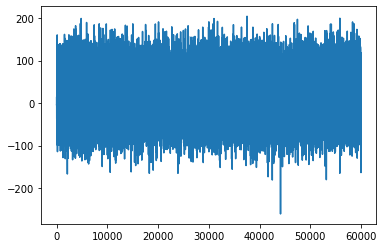

In [52]:
import matplotlib.pyplot as plt
plt.plot(payment_pr1q_mean_diff_days)

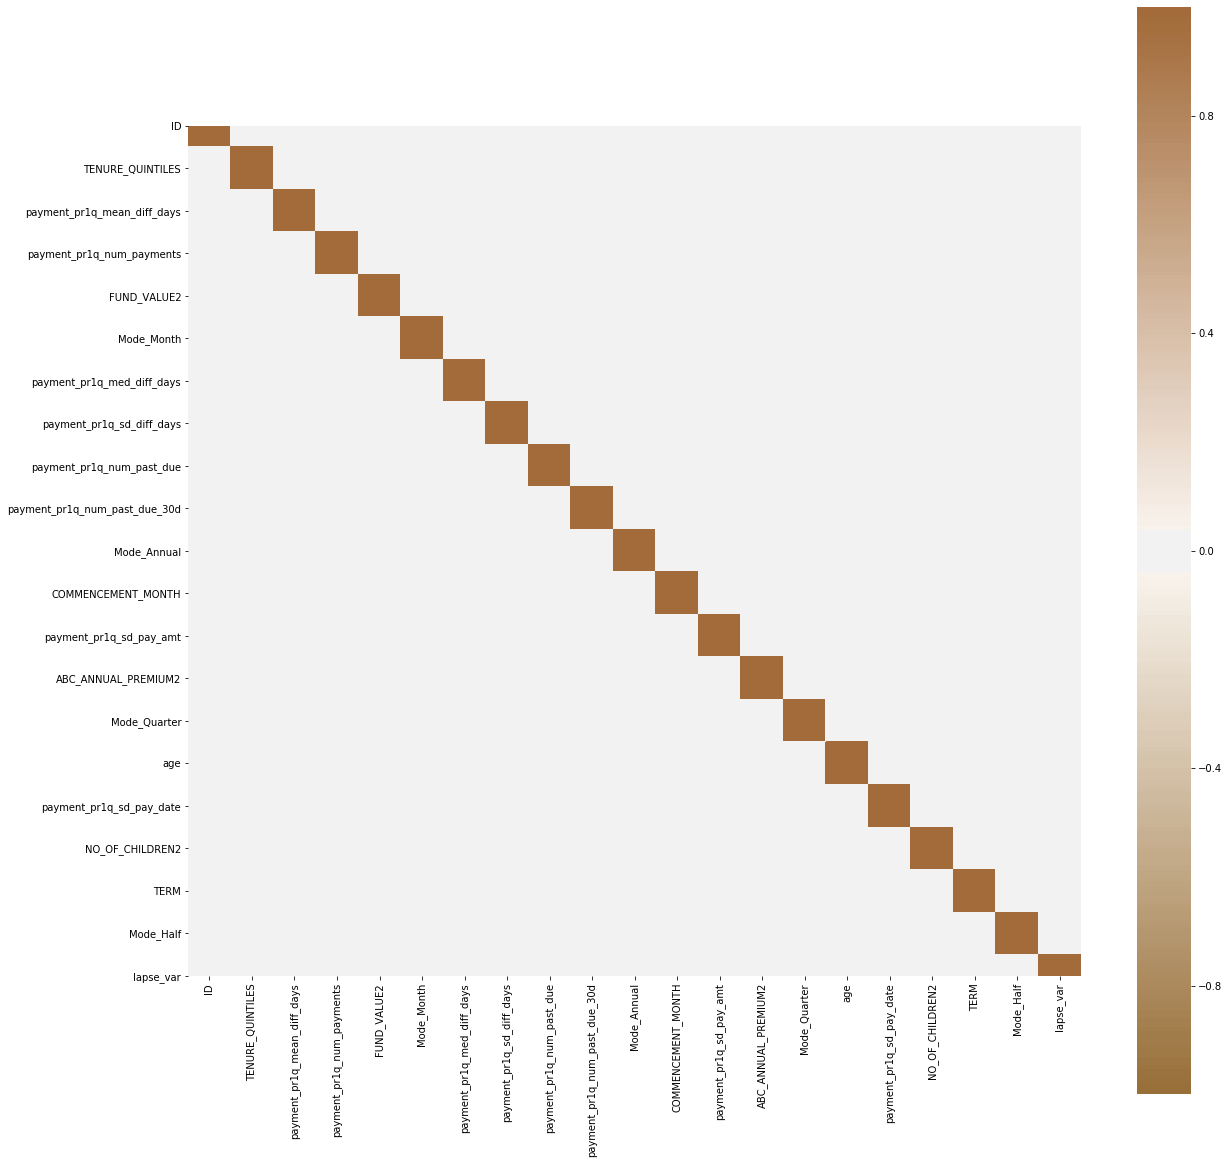

In [53]:
import numpy as np
import seaborn as sns
X = trainset.iloc[:,0:21]    #target column i.e price range
#get correlations of each features in dataset
corr = trainset.corr()
plt.figure(figsize=(20,20))
#plot heat map
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(50, 400, n=200),square=True)

In [55]:
trainset['payment_pr1q_num_past_due_30d'].fillna( method ='ffill', inplace = True) 
trainset['NO_OF_CHILDREN2'].fillna( method ='ffill', inplace = True) 

In [56]:
trainset.isnull().sum()

ID                               0
TENURE_QUINTILES                 0
payment_pr1q_mean_diff_days      0
payment_pr1q_num_payments        0
FUND_VALUE2                      0
Mode_Month                       0
payment_pr1q_med_diff_days       0
payment_pr1q_sd_diff_days        0
payment_pr1q_num_past_due        0
payment_pr1q_num_past_due_30d    0
Mode_Annual                      0
COMMENCEMENT_MONTH               0
payment_pr1q_sd_pay_amt          0
ABC_ANNUAL_PREMIUM2              0
Mode_Quarter                     0
age                              0
payment_pr1q_sd_pay_date         0
NO_OF_CHILDREN2                  0
TERM                             0
Mode_Half                        0
lapse_var                        0
dtype: int64

In [57]:
trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,1.0,...,3,3050.669914,18127.10254,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.52822,0,36.998385,4.362300,0.0,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [71]:
# Create the Scaler object
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(trainset.iloc[:,1:20])
# scaled_df = pd.DataFrame(scaled_df, columns=trainset.columns[1:20] )

In [73]:
predictors = scaled_df
target = trainset['lapse_var']

In [77]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics

In [106]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48005, 19), (12002, 19), (48005,), (12002,))

In [113]:
from sklearn.metrics import classification_report
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)
print(matrix)
print(report)
count = 0
for i in range(12002):
    if preds[i] == 1:
        count += 1
print(count)

[[11213     0]
 [  789     0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11213
           1       0.00      0.00      0.00       789

    accuracy                           0.93     12002
   macro avg       0.47      0.50      0.48     12002
weighted avg       0.87      0.93      0.90     12002

0


c:\users\kavinda\anaconda3\envs\opencv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,1.0,...,3,3050.669914,18127.10254,0,49.183609,-2.769722,0.0,13.750541,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,9,8186.397688,-49111.52822,0,36.998385,4.362300,0.0,15.552943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [149]:
modes = trainset.iloc[:,[5,10,14,19]]
# Mode_Month,Mode_Quarter,Mode_Half,Mode_Annual
Mode_Month = trainset['Mode_Month']
Mode_Quarter = trainset['Mode_Quarter']
Mode_Half = trainset['Mode_Half']
Mode_Annual = trainset['Mode_Annual']
print(modes)

       Mode_Month  Mode_Annual  Mode_Quarter  Mode_Half
0               1            0             0          0
1               1            0             0          0
2               1            0             0          0
3               1            0             0          0
4               1            0             0          0
...           ...          ...           ...        ...
60002           1            0             0          0
60003           1            0             0          0
60004           1            0             0          0
60005           1            0             0          0
60006           1            0             0          0

[60007 rows x 4 columns]


In [150]:
count2 = 0
for i in range(60007):
    count = 0
    if Mode_Month[i] == 1:
        count += 1
    if Mode_Quarter[i] == 1:
        count += 1
    if Mode_Half[i] == 1:
        count += 1
    if Mode_Annual[i] == 1:
        count += 1
    if count > 1:
        count2 += 1
print(count2)        

10132


In [163]:
import pandas as pd

trainset1 = pd.read_excel(r'E:\\hackstat final round\\insurance_syn_hackathon_phase1.xlsx')
trainset1 = trainset1.dropna()
print(trainset1.shape)
trainset1.isnull().sum()

(44869, 21)


ID                               0
TENURE_QUINTILES                 0
payment_pr1q_mean_diff_days      0
payment_pr1q_num_payments        0
FUND_VALUE2                      0
Mode_Month                       0
payment_pr1q_med_diff_days       0
payment_pr1q_sd_diff_days        0
payment_pr1q_num_past_due        0
payment_pr1q_num_past_due_30d    0
Mode_Annual                      0
COMMENCEMENT_MONTH               0
payment_pr1q_sd_pay_amt          0
ABC_ANNUAL_PREMIUM2              0
Mode_Quarter                     0
age                              0
payment_pr1q_sd_pay_date         0
NO_OF_CHILDREN2                  0
TERM                             0
Mode_Half                        0
lapse_var                        0
dtype: int64

In [152]:
trainset1

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,COMMENCEMENT_MONTH,payment_pr1q_sd_pay_amt,ABC_ANNUAL_PREMIUM2,Mode_Quarter,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,5,-1540.834997,14847.77534,0,59.703765,6.927565,0.0,13.533617,0,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,1,11687.537130,103898.55730,0,46.821003,8.148305,0.0,21.999173,0,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,3,11349.370640,-64724.09148,0,29.872764,12.255236,0.0,24.802638,0,0
5,6,2,-22.163258,2.688417,2.070000e+07,1,126.528610,42.478879,0.769801,1.0,...,9,6181.590677,22009.44052,0,43.411640,4.933647,1.0,16.979481,0,0
6,7,2,52.431916,-0.272151,7.567418e+06,0,51.859362,-64.109020,3.877532,1.0,...,9,-5270.475590,27565.70881,0,29.869986,6.011440,2.0,12.062683,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,2,-4566.366068,180299.31340,0,29.838690,1.810030,0.0,21.835799,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,6,8937.487299,168677.03520,0,48.442519,2.280073,0.0,18.919716,0,0
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,4,-9342.509054,72870.85922,0,61.568204,1.364022,0.0,34.112120,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,9,2241.004176,46153.08708,0,39.878620,7.729683,0.0,20.903099,0,0


In [198]:
tenture_dummies = pd.get_dummies(trainset['TENURE_QUINTILES'])
# tenture_dummies.rename({'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'}, axis='columns')
new_trainset = pd.concat([trainset,tenture_dummies],axis=1, names = {'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'})
new_trainset

,ID,TENURE_QUINTILES,payment_pr1q_mean_diff_days,payment_pr1q_num_payments,FUND_VALUE2,Mode_Month,payment_pr1q_med_diff_days,payment_pr1q_sd_diff_days,payment_pr1q_num_past_due,payment_pr1q_num_past_due_30d,...,age,payment_pr1q_sd_pay_date,NO_OF_CHILDREN2,TERM,Mode_Half,lapse_var,0,1,2,3
0,1,1,-4.151475,8.065577,-2.530957e+06,1,95.810812,52.960115,3.871131,1.0,...,59.703765,6.927565,0.0,13.533617,0,0,0,1,0,0
1,2,2,-5.476620,4.935046,3.790000e+07,1,-20.876256,8.775671,4.037578,NaN,...,49.183609,-2.769722,0.0,13.750541,0,0,0,0,1,0
2,3,2,14.498615,5.499367,-2.550000e+07,1,52.123828,40.504105,0.947059,1.0,...,46.821003,8.148305,0.0,21.999173,0,0,0,0,1,0
3,4,0,23.824406,6.518387,6.667302e+06,1,40.171606,19.587609,4.033237,0.0,...,29.872764,12.255236,0.0,24.802638,0,0,1,0,0,0
4,5,0,0.931913,1.775785,-9.972933e+06,1,-58.912534,8.756755,1.107156,1.0,...,36.998385,4.362300,NaN,15.552943,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60002,60003,1,50.412955,5.467595,1.530000e+07,1,-37.119826,-64.257195,4.136871,1.0,...,29.838690,1.810030,0.0,21.835799,0,0,0,1,0,0
60003,60004,3,39.284992,1.947457,-8.484943e+06,1,90.992461,68.550539,1.068679,1.0,...,48.442519,2.280073,0.0,18.919716,0,0,0,0,0,1
60004,60005,0,26.433686,3.189202,8.939695e+06,1,97.129089,36.576560,3.648770,0.0,...,61.568204,1.364022,0.0,34.112120,0,0,1,0,0,0
60005,60006,1,73.894707,3.412002,2.040000e+07,1,-24.414015,-60.096657,0.487497,0.0,...,39.878620,7.729683,0.0,20.903099,0,0,0,1,0,0


In [196]:
tenture_dummies
# p = tenture_dummies.rename(index=str,columns={'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'})
old_names = ['0', '1', '2', '3'] 
new_names = ['TENURE_QUINTILES_0', 'TENURE_QUINTILES_1', 'TENURE_QUINTILES_2', 'TENURE_QUINTILES_3']
tenture_dummies.rename(columns=dict(zip(old_names, new_names)), inplace=True)
# tenture_dummies.rename(index = {'0':'TENURE_QUINTILES_0', '1':'TENURE_QUINTILES_1', '2':'TENURE_QUINTILES_2', '3':'TENURE_QUINTILES_3'}, inplace = True) 

AttributeError: 'NoneType' object has no attribute 'rename'

In [ ]:
tenture_dummies